In [1]:
import pandas
import string
import pandas as pd
import numpy as np
from src.structure_data import txt2df
from src.transform_filter import hierarchize_org, classify_layer, scale_plot
import seaborn as sns
import matplotlib.pyplot  as plt

In [2]:
TIME_YEAR = "21" # TIME_YEAR = ["18", "21"]
TIME_MONTH = "09" # for loop
TIME = TIME_YEAR + TIME_MONTH
DATA_DIR = "data/"
DATA_SOURCE = "agency/"
DATA_LOC = DATA_DIR + DATA_SOURCE + TIME

## GETTING VENSIM PARAMETERS (fractions in aqua color)

In [4]:
df = pd.read_pickle(f'{DATA_LOC}'+ "/agency_hier_5_['SALARY', 'EMPLOYMENT'].pkl")

In [11]:
# manager's salary greater than nonmanager, salary_frac = .8 TODO: why such small diff?
df.groupby('5is_mng')['SALARY'].mean()

5is_mng
False     86602.555180
True     116846.855898
Name: SALARY, dtype: float64

In [31]:
sup = df.groupby("3AGY")['5is_mng'].sum()
tot = df.groupby("3AGY")['EMPLOYMENT'].count()
suptot = pd.concat([sup, tot], axis = 1)
suptot["ratio"]= suptot["5is_mng"]/suptot["EMPLOYMENT"]

In [34]:
suptot

,5is_mng,EMPLOYMENT,ratio
3AGY,,,
AA,4,10,0.400000
AB,45,83,0.542169
AF,29928,174509,0.171498
AG,13559,91774,0.147743
AH,88,414,0.212560
...,...,...,...
WX,2,8,0.250000
ZL,1,49,0.020408
ZP,11,31,0.354839


In [36]:
# larger the agency, smaller employment ratio
suptot.ratio.corr(suptot.EMPLOYMENT)

-0.20341134531260577

array([[<AxesSubplot: title={'center': '5is_mng'}>,
        <AxesSubplot: title={'center': 'EMPLOYMENT'}>],
       [<AxesSubplot: title={'center': 'ratio'}>, <AxesSubplot: >]],
      dtype=object)

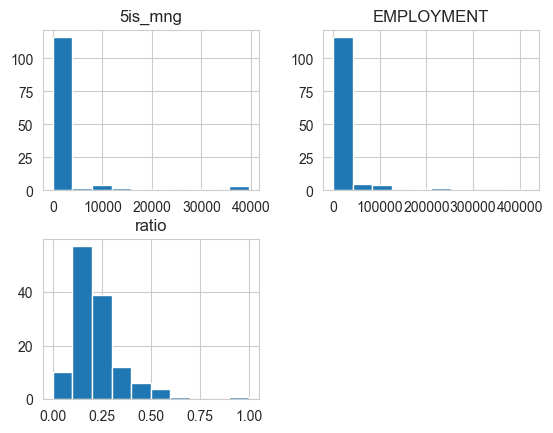

In [37]:
suptot.hist()

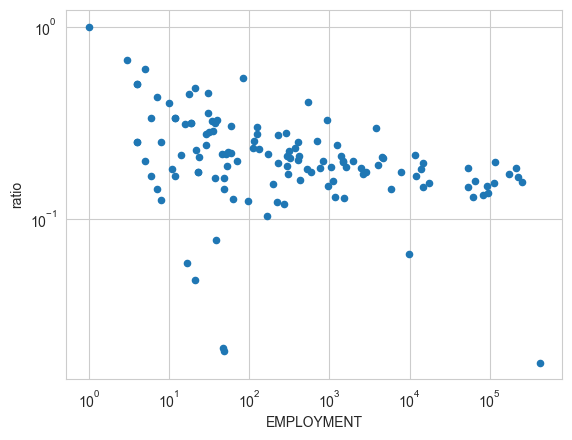

In [6]:
scale_plot(TIME)

## DYNAMIC ANALYSIS (1809 vs 2109)

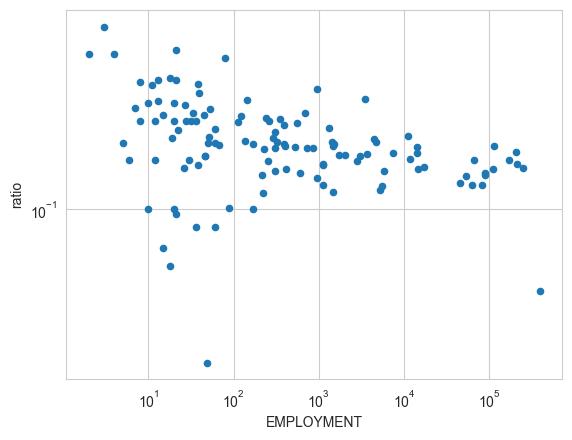

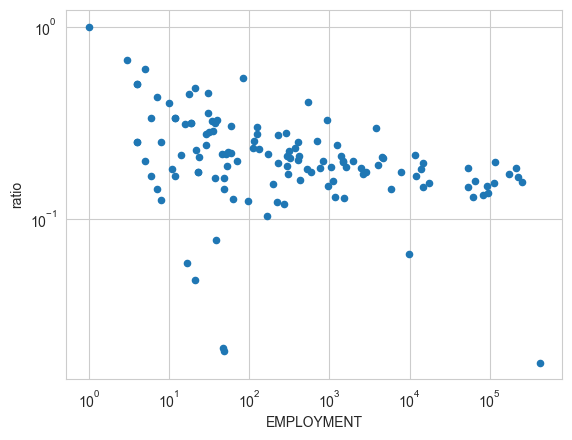

In [5]:
TIME_YEAR = ["18", "21"]
TIME_MONTH = "09"
df_dict = dict() # upgrade to xarray with time coordinate
for year in TIME_YEAR:
     TIME = year + TIME_MONTH
     #df_dict[TIME] = hierarchize_org(TIME, features = ['SALARY', 'EMPLOYMENT'], layers = 5) # create pkl
     scale_plot(TIME)

In [ ]:
## NEXT?

## DIVING INTO HIERARCHY

In [25]:
for i in range(2, df.shape[1]):
     a = pd.unique(df.iloc[:, i])
     print(df.columns[i], len(a),a)

2AGYTYP 4 [4 1 3 2]
3AGY 130 ['AA' 'AB' 'AF' 'AG' 'AH' 'AM' 'AN' 'AP' 'AR' 'AU' 'AW' 'BD' 'BF' 'BG'
 'BH' 'BK' 'BO' 'BT' 'BW' 'CC' 'CE' 'CF' 'CM' 'CT' 'CU' 'CX' 'DB' 'DD'
 'DG' 'DJ' 'DL' 'DN' 'DQ' 'EB' 'EC' 'ED' 'EE' 'EO' 'EP' 'EQ' 'EW' 'FC'
 'FD' 'FI' 'FJ' 'FK' 'FL' 'FM' 'FQ' 'FR' 'FT' 'FW' 'GB' 'GC' 'GE' 'GG'
 'GJ' 'GQ' 'GS' 'GU' 'GW' 'GX' 'GY' 'GZ' 'HB' 'HD' 'HE' 'HF' 'HP' 'HS'
 'HT' 'HU' 'HW' 'IB' 'IF' 'IG' 'IN' 'IP' 'JL' 'KS' 'KY' 'LF' 'LP' 'MA'
 'MC' 'MI' 'NF' 'NK' 'NL' 'NM' 'NN' 'NP' 'NQ' 'NS' 'NU' 'NV' 'OM' 'OS'
 'PU' 'QQ' 'RE' 'RF' 'RH' 'RO' 'RR' 'RS' 'SB' 'SE' 'SK' 'SM' 'SS' 'ST'
 'SZ' 'TB' 'TC' 'TD' 'TN' 'TR' 'TS' 'TW' 'UJ' 'UT' 'VA' 'VD' 'WK' 'WX'
 'ZL' 'ZP' 'ZS' 'ZU']
4AGYSUB 533 ['AA00' 'AB00' 'AF02' 'AF03' 'AF06' 'AF07' 'AF09' 'AF0B' 'AF0D' 'AF0J'
 'AF0M' 'AF0R' 'AF0U' 'AF0V' 'AF12' 'AF13' 'AF16' 'AF17' 'AF1B' 'AF1C'
 'AF1L' 'AF1M' 'AF1Q' 'AF1S' 'AF1Y' 'AF20' 'AF2A' 'AF2E' 'AF2F' 'AF2H'
 'AF2I' 'AF2K' 'AF2L' 'AF2M' 'AF2R' 'AF2S' 'AF2T' 'AF2Z' 'AF34' 'AF38'
 'AF3C' 'AF3D'

In [105]:
# set(df_af.AGYSUBT)

{'AF02-AIR FORCE INSPECTION AGENCY (FO)',
 'AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER',
 'AF06-AIR FORCE AUDIT AGENCY',
 'AF07-AIR FORCE OFFICE OF SPECIAL INVESTIGATIONS',
 'AF09-AIR FORCE PERSONNEL CENTER',
 'AF0B-U.S. AIR FORCE ACADEMY',
 'AF0D-U.S. AIR FORCES, EUROPE',
 'AF0J-AIR EDUCATION AND TRAINING COMMAND',
 'AF0M-HEADQUARTERS, AIR FORCE RESERVE COMMAND',
 'AF0R-PACIFIC AIR FORCES',
 'AF0U-25 AF',
 'AF0V-AIR FORCE SPECIAL OPERATIONS COMMAND',
 'AF12-AIR FORCE PUBLIC AFFAIRS AGENCY',
 'AF13-HQ USAF AND SUPPORT ELEMENTS',
 'AF16-AIR FORCE MORTUARY AFFAIRS OPERATIONS',
 'AF17-AF INSTALLATION AND MISSION SUPPORT',
 'AF1B-AIR FORCE MANPOWER ANALYSIS AGENCY',
 'AF1C-AIR COMBAT COMMAND',
 'AF1L-AIR MOBILITY COMMAND',
 'AF1M-AIR FORCE MATERIEL COMMAND',
 'AF1Q-HQ AF FLIGHT STANDARDS AGENCY',
 'AF1S-HEADQUARTERS, AIR FORCE SPACE COMMAND',
 'AF1Y-AIR FORCE CIVILIAN CAREER TRAINING',
 'AF20-AIR FORCE AGENCY FOR MODELING/SIMULATION',
 'AF2A-AIR FORCE COST ANALYSIS AGENCY',
 'AF

<AxesSubplot: >

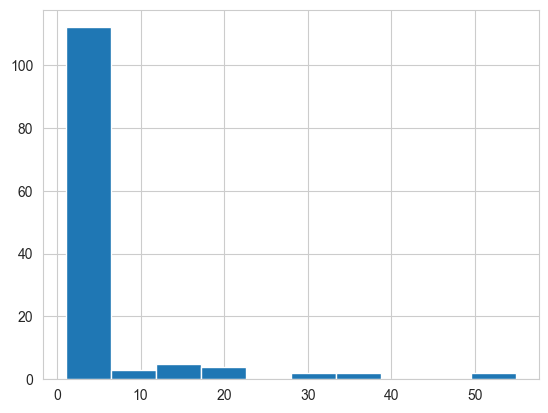

In [138]:
# graph of groupby('3AGY')['4AGYSUB'].count().hist()

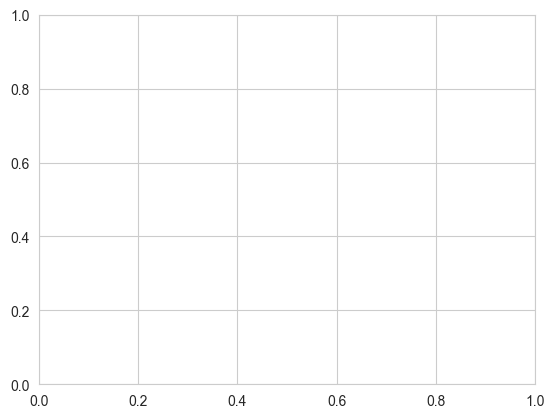

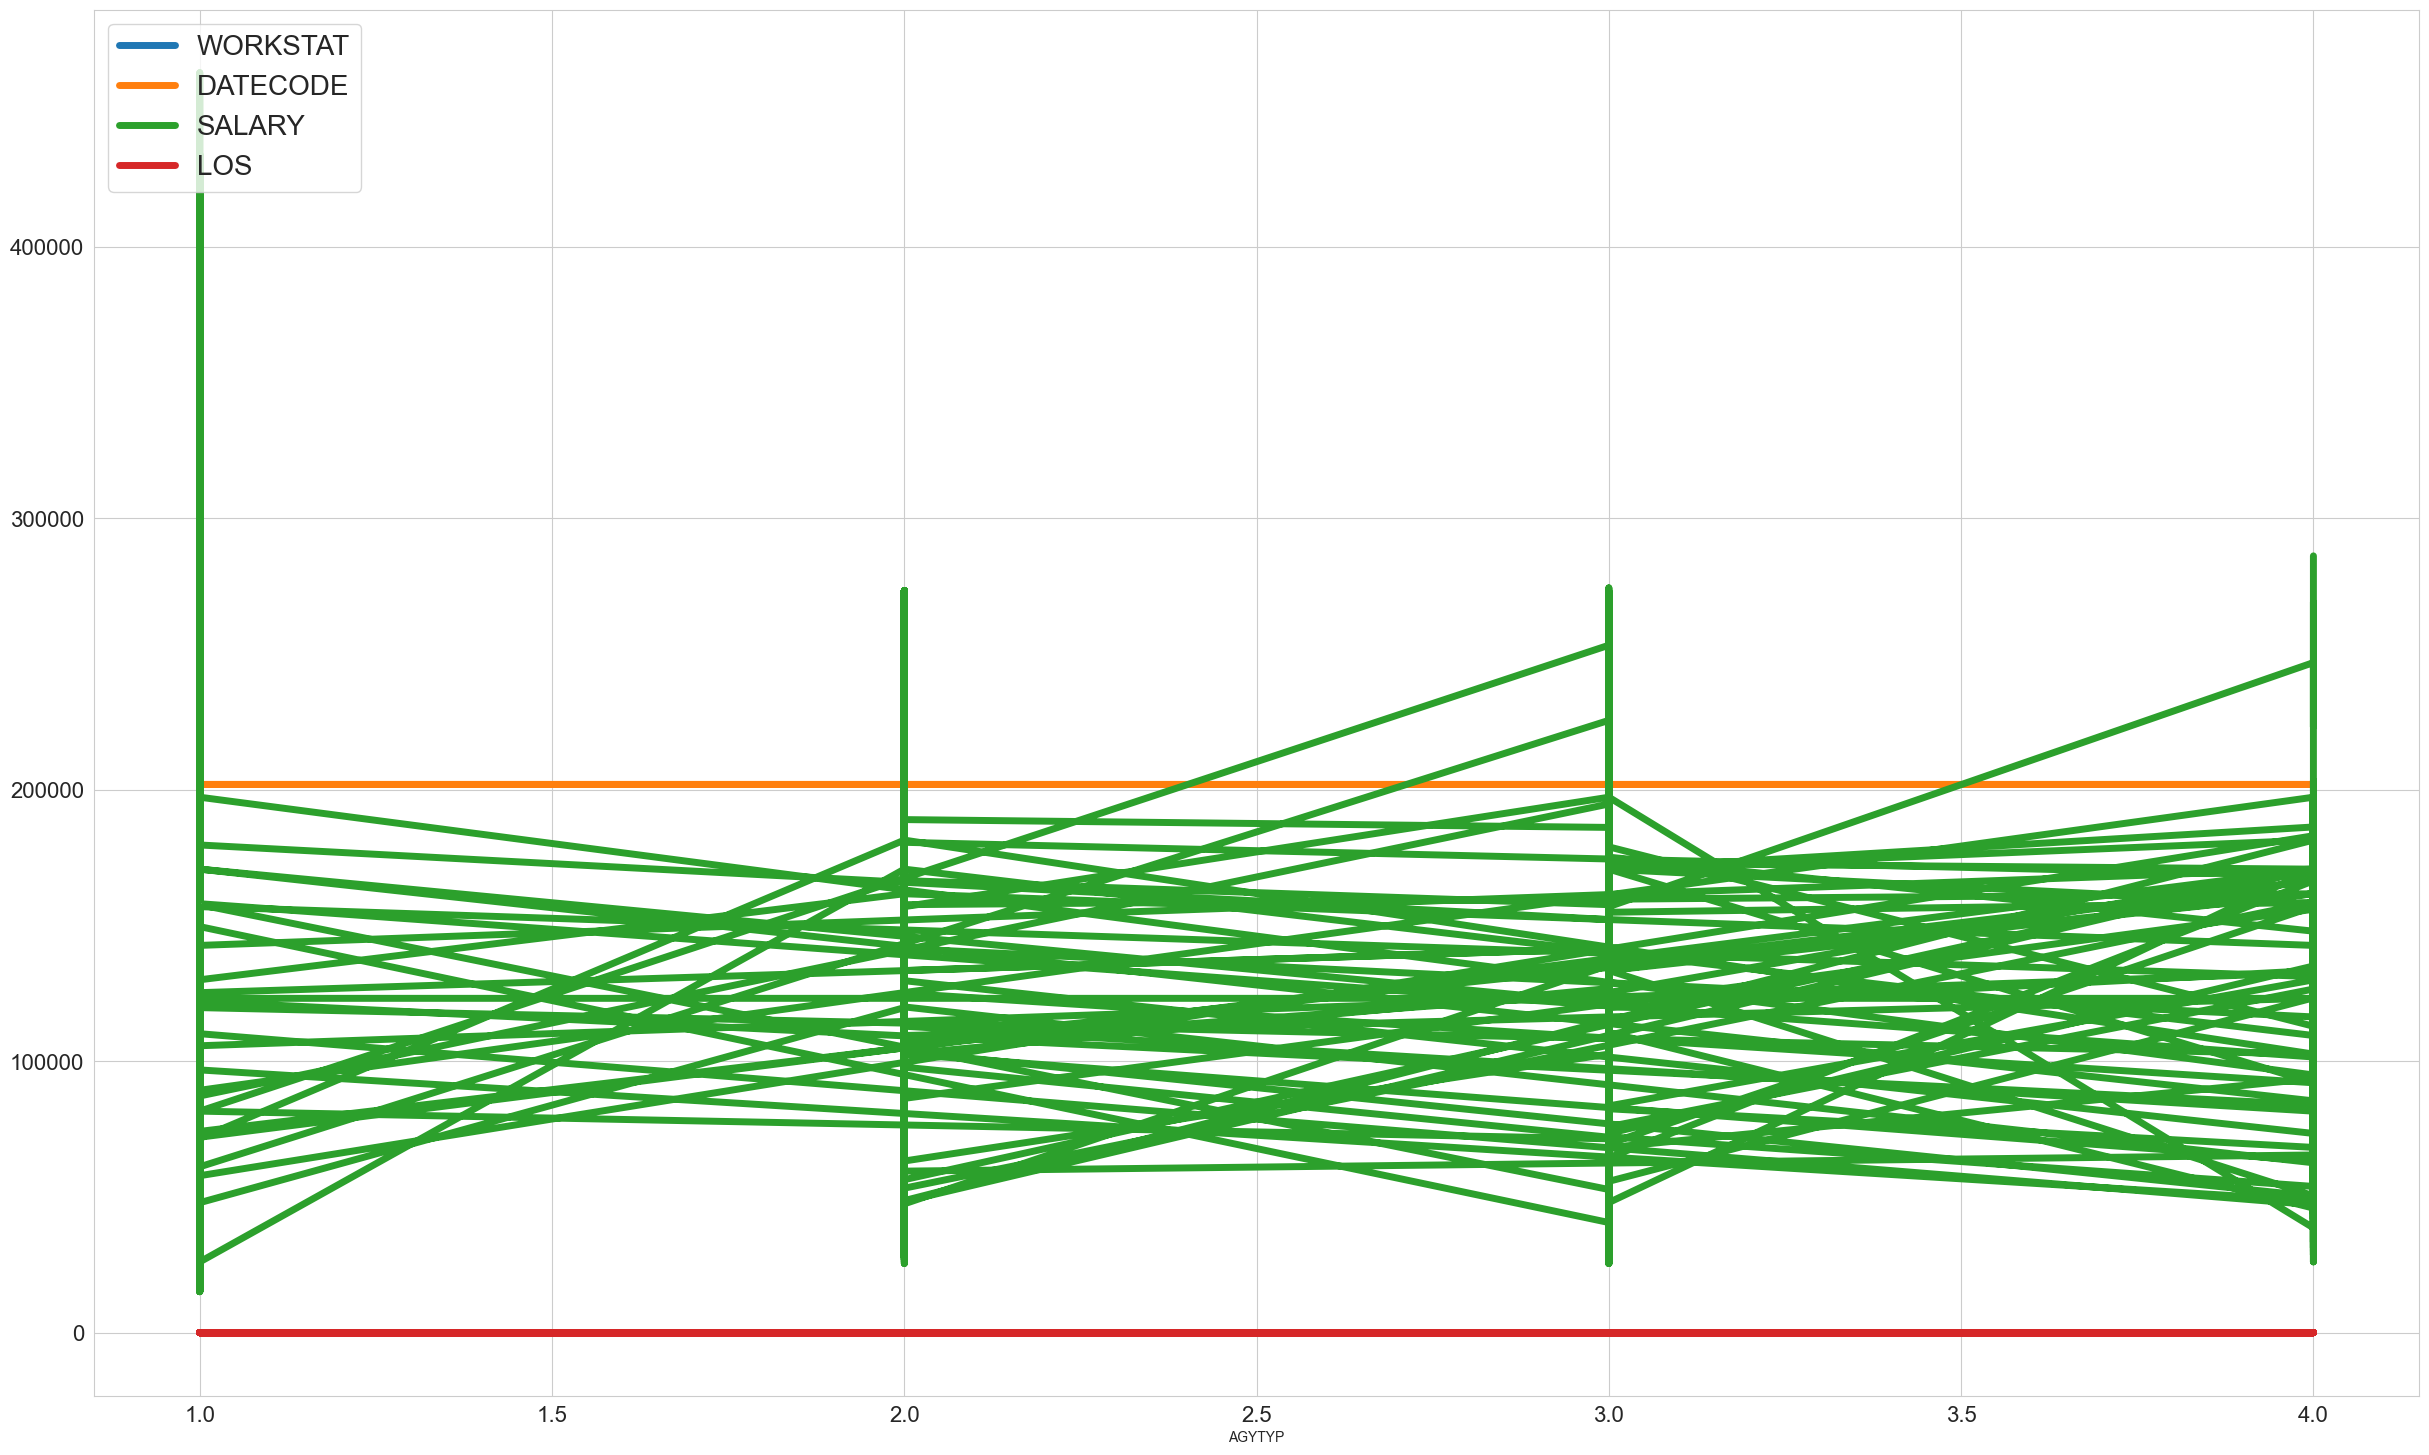

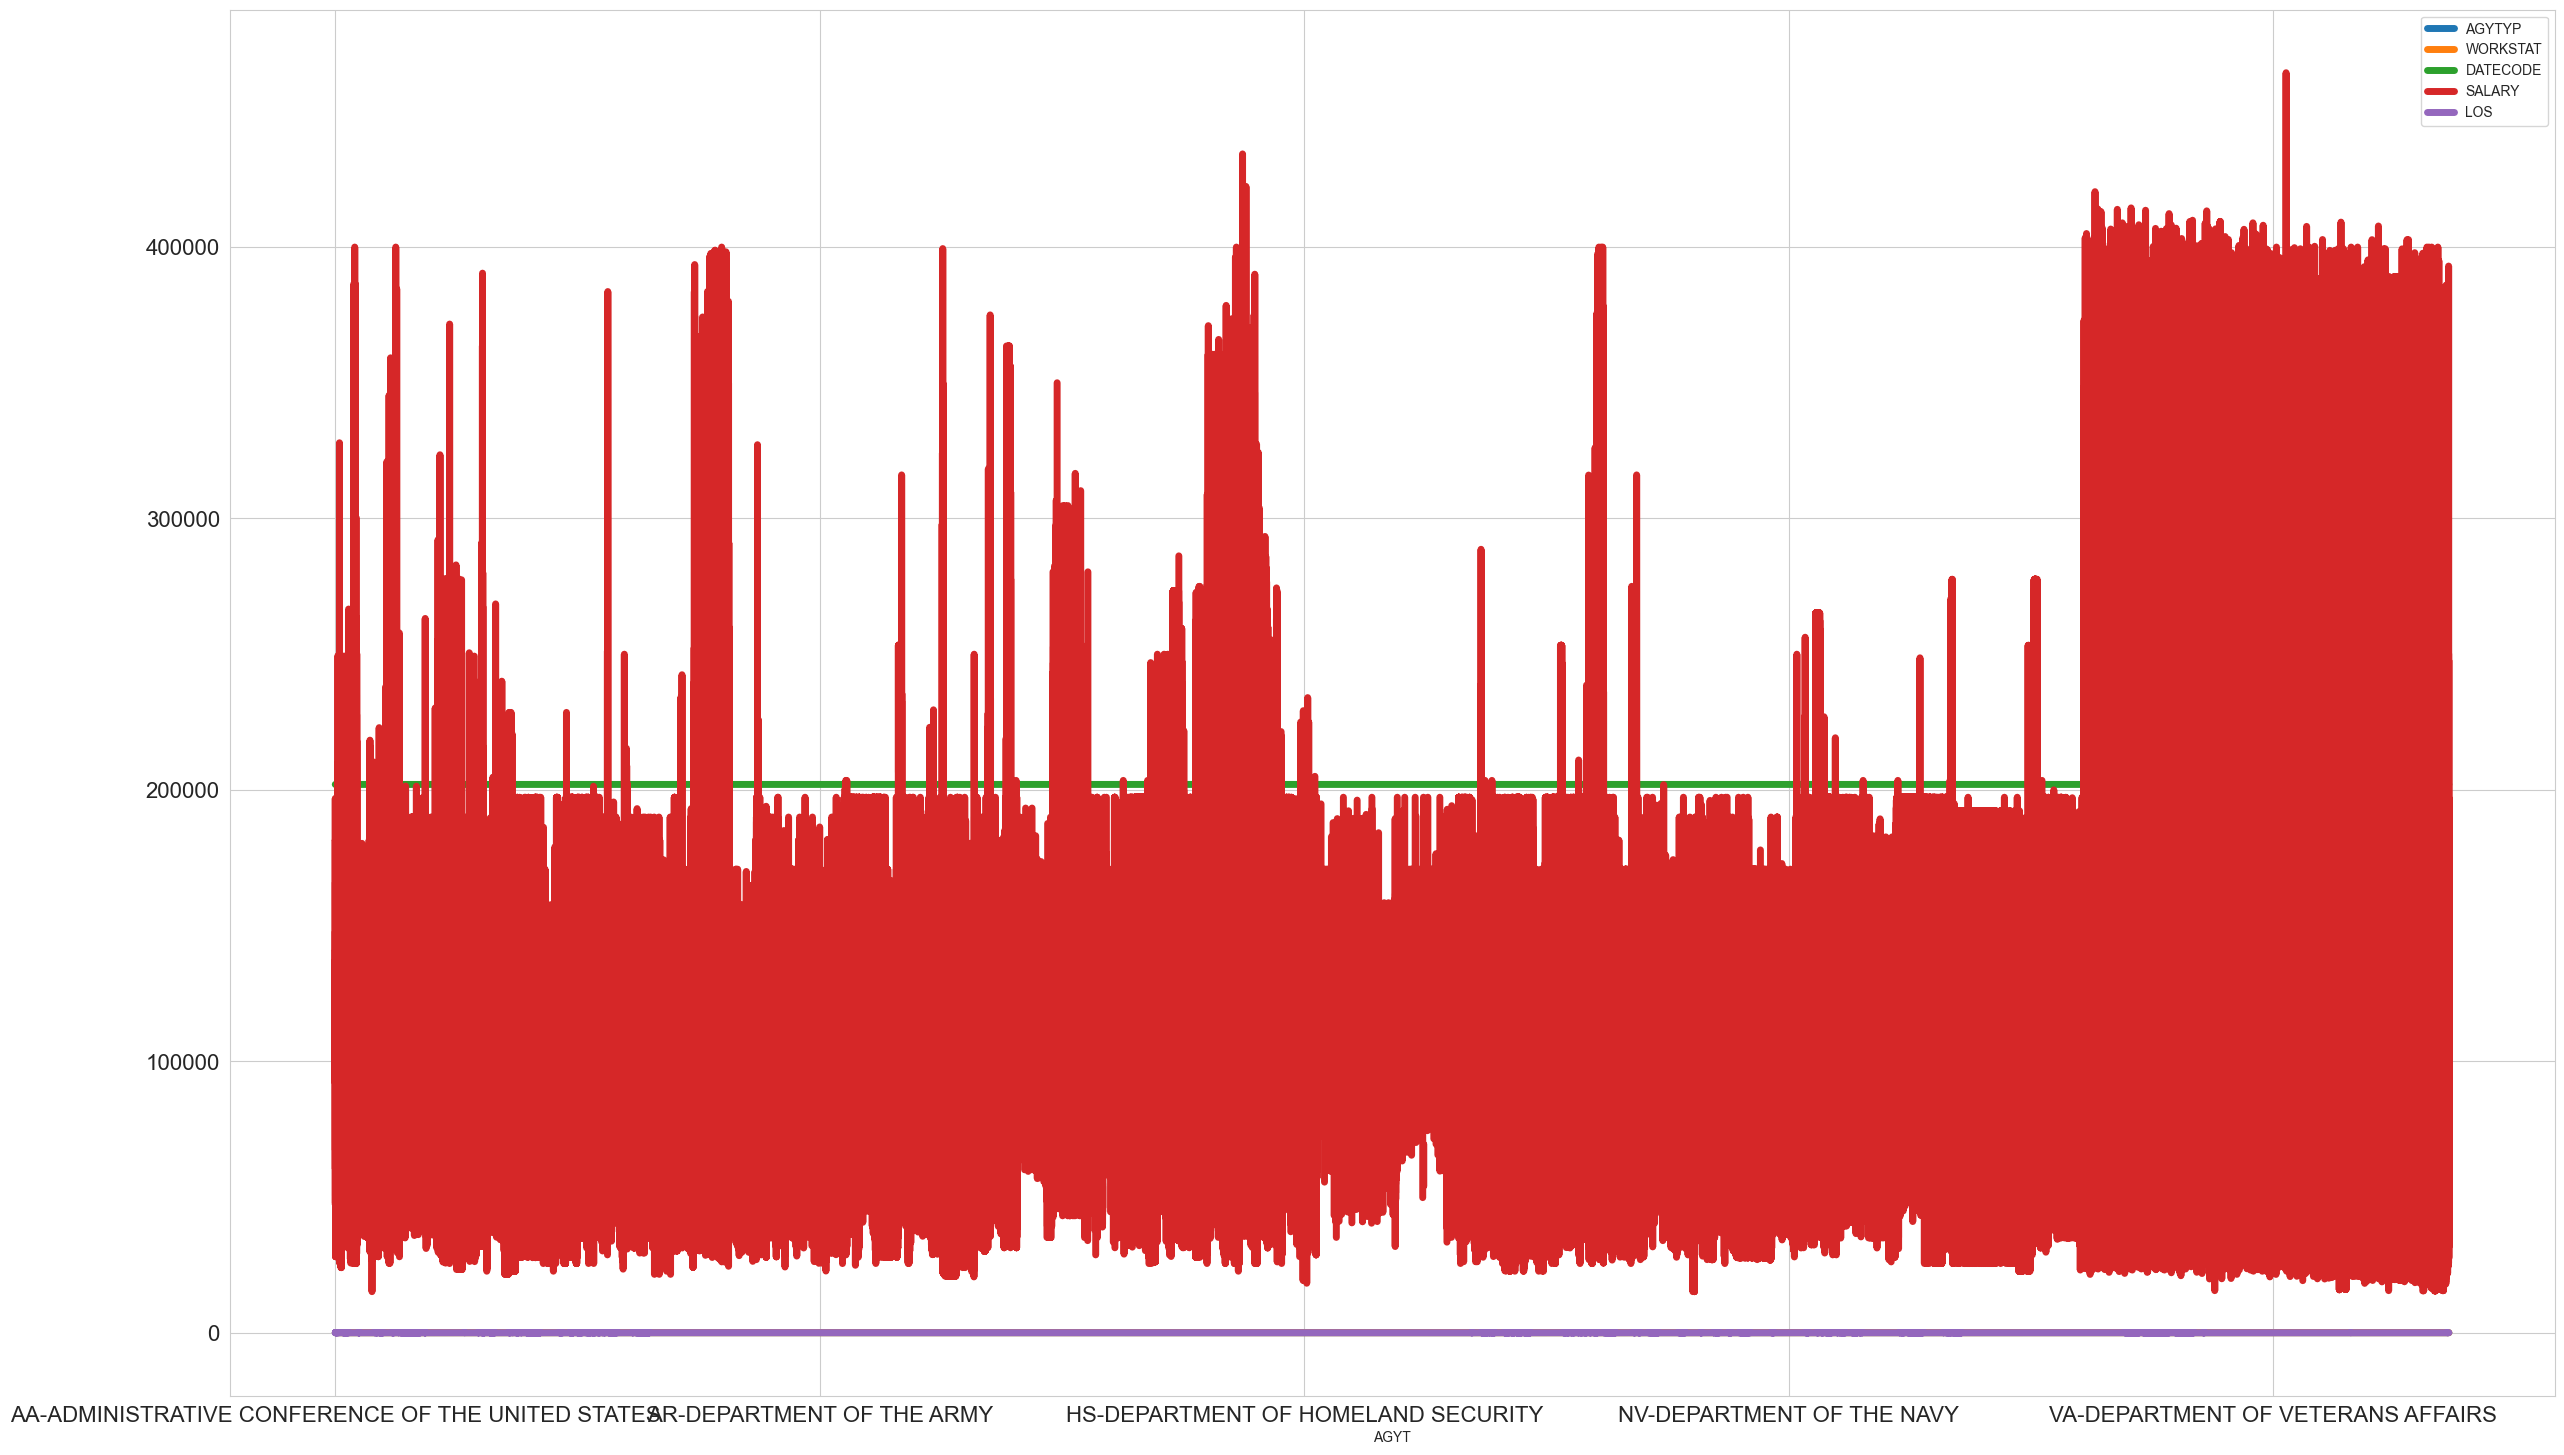

In [90]:
#df['AGYTYP'].hist()
plt.subplots()
ax1 = df.plot('AGYTYP',figsize=(30,18),linewidth=5,legend=True, fontsize=16)
ax1.legend(loc=2,fontsize=20)
ax2 = df.plot('AGYT',figsize=(30,18),linewidth=5,legend=True, fontsize=16)
plt.show()
#df['AGYTYPT'].hist()

## Plot

In [ ]:
sup18 = df.groupby("AGY")['sup'].sum()
tot18 = df_all.groupby("AGY")['EMPLOYMENT'].count()
supbytot = pd.concat([sup18, tot18], axis = 1)

print(df_super.groupby("AGY")["EMPLOYMENT"].count())
print(df_sub.groupby("AGY")["EMPLOYMENT"].count())

In [10]:
# number of managers in each AGY
df.groupby("AGY")['is_mng'].sum()

AGY
AA        4
AB       45
AF    29928
AG    13559
AH       88
      ...  
WX        2
ZL        1
ZP       11
ZS        7
ZU        3
Name: is_mng, Length: 130, dtype: int64

3AGY
AA        4
AB       45
AF    29928
AG    13559
AH       88
      ...  
WX        2
ZL        1
ZP       11
ZS        7
ZU        3
Name: 5is_mng, Length: 130, dtype: int64